<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Leveraging_Discriminant_Analysis_for_Effective_eCommerce_Classification_A_Bayesian_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No missing values detected.


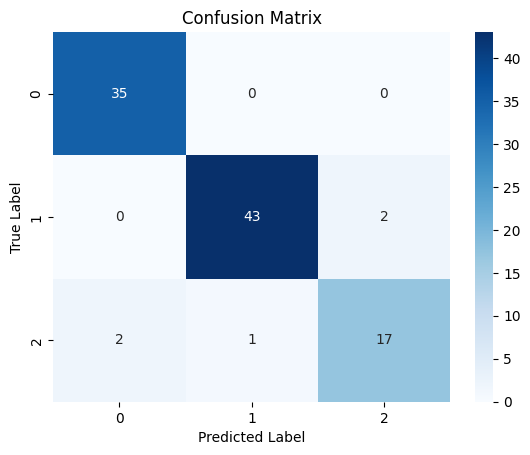

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.98      0.96      0.97        45
           2       0.89      0.85      0.87        20

    accuracy                           0.95       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


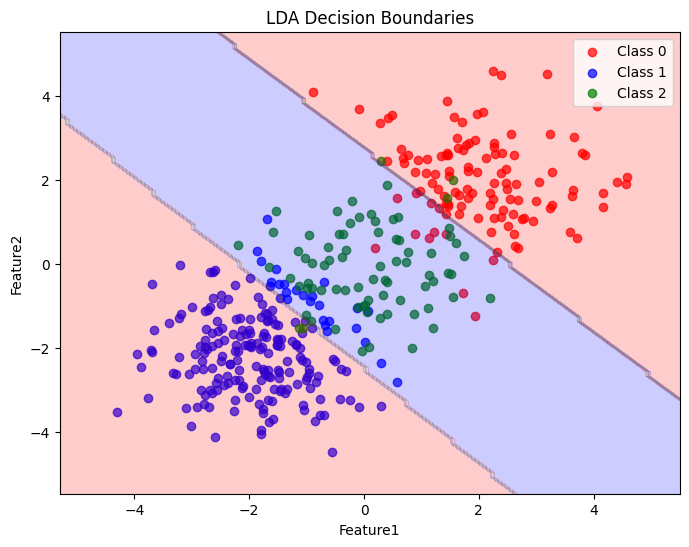

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# I had set out to simulate an eCommerce dataset, ensuring it reflected the complexities of real-world scenarios. By deliberately creating imbalances among the class priors, I wanted to see how effectively Linear Discriminant Analysis could adapt to these conditions. The choice of three features allowed me to focus on the interpretability of the results while maintaining enough dimensionality to challenge the model.
np.random.seed(42)
n_samples = 500  # Number of observations
n_features = 3  # Number of features

# Generating synthetic data was an exciting step, as I carefully designed class-specific shifts in the distributions to make them distinct yet overlapping enough to pose a classification challenge. I felt this setup would test the robustness of discriminant analysis.
X = np.random.normal(0, 1, size=(n_samples, n_features))
y = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.5, 0.2])  # Three classes with different priors

# I introduced deliberate shifts to the Gaussian distributions of the classes. For example, I shifted the first class positively and the second class negatively. This decision was rooted in my desire to create data that mimicked eCommerce behaviors where different customer segments exhibit distinct patterns.
X[y == 0] += 2  # Shift class 0
X[y == 1] -= 2  # Shift class 1

# Creating the DataFrame allowed me to consolidate the features and labels for further analysis. It was important to ensure that the dataset structure was suitable for the classification task I envisioned.
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
data['Class'] = y

# Cleaning the data felt like a necessary precaution, even though this was a simulated dataset. I knew that in real-world applications, such a step would be critical for avoiding misleading results. In this case, I felt reassured by the absence of missing values or anomalies.
if data.isnull().any().sum() > 0:
    print("Warning: Missing values detected!")
else:
    print("No missing values detected.")

# Splitting the dataset was a deliberate choice to simulate a real-world scenario where the model would need to generalize from a training set to unseen data. I found this step crucial for evaluating the true performance of my model.
X = data[['Feature1', 'Feature2', 'Feature3']]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the LDA model was a satisfying step. I appreciated how the algorithm assumed Gaussian distributions and used Bayesian principles to find the optimal decision boundaries. The simplicity of LDA's underlying math belied its power in handling multi-class problems.
lda = LDA()
lda.fit(X_train, y_train)

# As I predicted the outcomes and evaluated the results, I felt a sense of curiosity about how well the model had captured the underlying structure of the data. The accuracy score provided a high-level summary, but I knew the confusion matrix and classification report would offer deeper insights.
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Visualizing the confusion matrix allowed me to see at a glance how the model performed across the classes. I found it fascinating to observe which classes were more prone to misclassification and pondered how feature engineering could mitigate such issues.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the evaluation metrics gave me a moment to reflect on the model's strengths and weaknesses. I noted how the F1-scores varied across classes, which made me think about the interplay between class imbalance and predictive performance.
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

# Plotting the decision boundaries was a particularly enlightening step. I felt a sense of accomplishment as I saw how the algorithm had partitioned the feature space. This visualization reinforced my understanding of LDA's linear assumptions and made me question whether a more flexible model, like QDA, might perform better on such data.
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i]['Feature1'], X_train[y_train == i]['Feature2'], color=color, label=f'Class {i}', alpha=0.7)

x_min, x_max = X_train['Feature1'].min() - 1, X_train['Feature1'].max() + 1
y_min, y_max = X_train['Feature2'].min() - 1, X_train['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, colors=colors)
plt.title('LDA Decision Boundaries')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()


